# Election 실습

In [67]:
# 필요한 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Data 불러오기
election = pd.read_csv("../Data/election_2022.csv")
# 한글 깨지면 : encoding="utf-8" 데이터 불러올 때 해주면 된다. 
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072
...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007


In [69]:
# 기본 통계량 확인하기
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


- mean, max, min, std 확인
- max, std가 이재명이 더 높은 이유는 이재명을 지지하는 구역에서 표를 많이 받았다는 의미이다. 그래서 표준오차가 더 높다

In [70]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [71]:
# dimension 확인하기
election.shape

(248, 7)

In [72]:
# 컬럼별 자료 타입 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [73]:
# NaN
election.isnull().any()     # true 하나라도 있으면 나옴 (all은 안됨!)

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [74]:
# election에 electionSum이라는 컬럼 생성(윤석열 + 이재명 + 심상정)
election.head()
election['electionSum'] = election[['윤석열','이재명','심상정']].sum(axis='columns')    # axis=1
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [75]:
# electionSum이 투표수(pop)의 몇 퍼센트?
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [76]:
# csv로 저장하기
# df.to_csv("../Data/df_sample.csv")
# index=False : 의미 없는 인덱스면 false, 의미 있으면 true
# election.to_csv("../Data/election_2022_job.csv", index=False)

- 파이 차트

In [77]:
# df_origin['count'].plot(
#     kind='pie',
#     figsize=(7, 5),      # label때문에 7:5로 사용
#     autopct='%.2f%%',
#     startangle=10,      # 파이차트 출력 위치 조정
#     colors=['chocolate', 'bisque', 'cadetblue']
# )

# plt.title('Model Origin', size = 20)
# plt.axis('equal')
# plt.legend(
#     labels=df_origin.index,
#     loc='upper right'
# )

# plt.show()

In [78]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [79]:
elec_sum = election.pivot_table("투표수", index='광역시도', aggfunc=sum)
# aggfunc='size' : data값의 크기를 기준으로 집계한다. (데이터 합계가 아니라 count 해줌)
elec_sum

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [80]:
elec_sum_order = elec_sum.sort_values(by='투표수', ascending=False)
elec_sum_order.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


In [81]:
# 수도권 투표율 갑자기 궁금해서 해봄 
elec_sum_order['투표수'][[0,1,4]].sum() / elec_sum_order['투표수'].sum() * 100

50.064733355557756

In [82]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

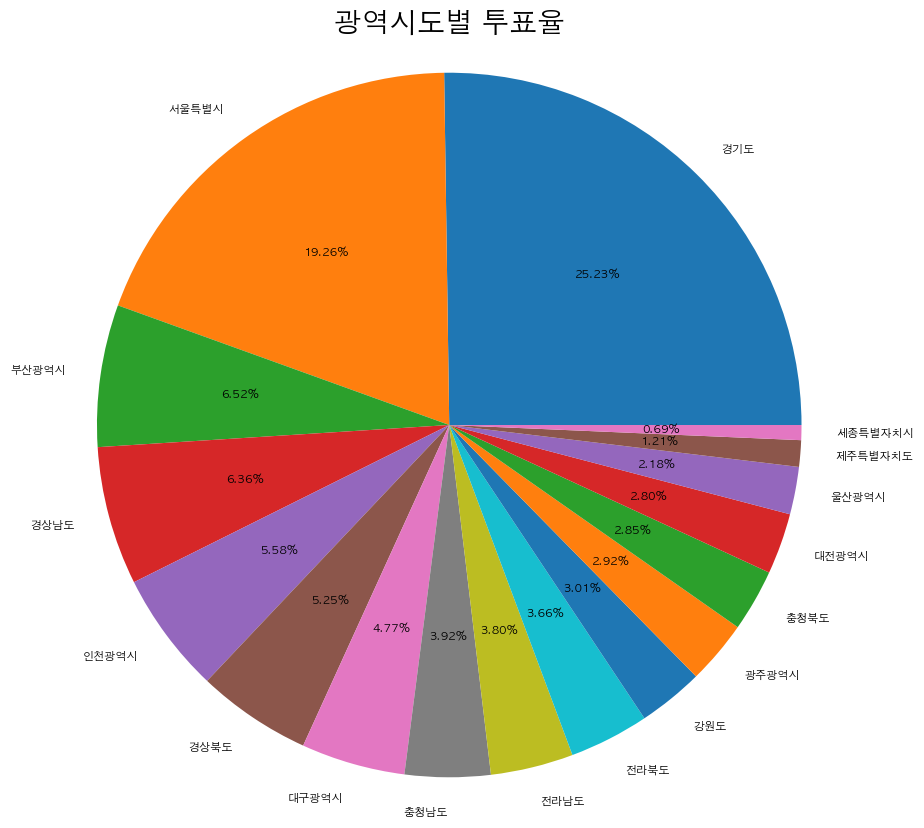

In [83]:
elec_sum_order['투표수'].plot(
    kind='pie',
    figsize=(10, 10),      # label때문에 7:5로 사용
    autopct='%.2f%%',
    startangle=0,      # 파이차트 출력 위치 조정
    # colors=['chocolate', 'bisque', 'cadetblue']
)

plt.title('광역시도별 투표율', size = 20)
plt.axis('equal')
plt.rcParams['font.size'] = 8
plt.ylabel('')
# plt.legend(
#     labels=df.index,
#     loc='upper right'
# )

plt.show()

### 윤석열 후보의 광역시도별 득표율을 pie chart로 표현하기

In [84]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [85]:
elec_yun = election.pivot_table("윤석열", index='광역시도', aggfunc=sum)
# aggfunc='size' : data값의 크기를 기준으로 집계한다. (데이터 합계가 아니라 count 해줌)
elec_yun

,윤석열
광역시도,
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747


- 데이터 정렬

In [86]:
elec_yun_order = elec_yun.sort_values(by='윤석열', ascending=False)
elec_yun_order.head()

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346


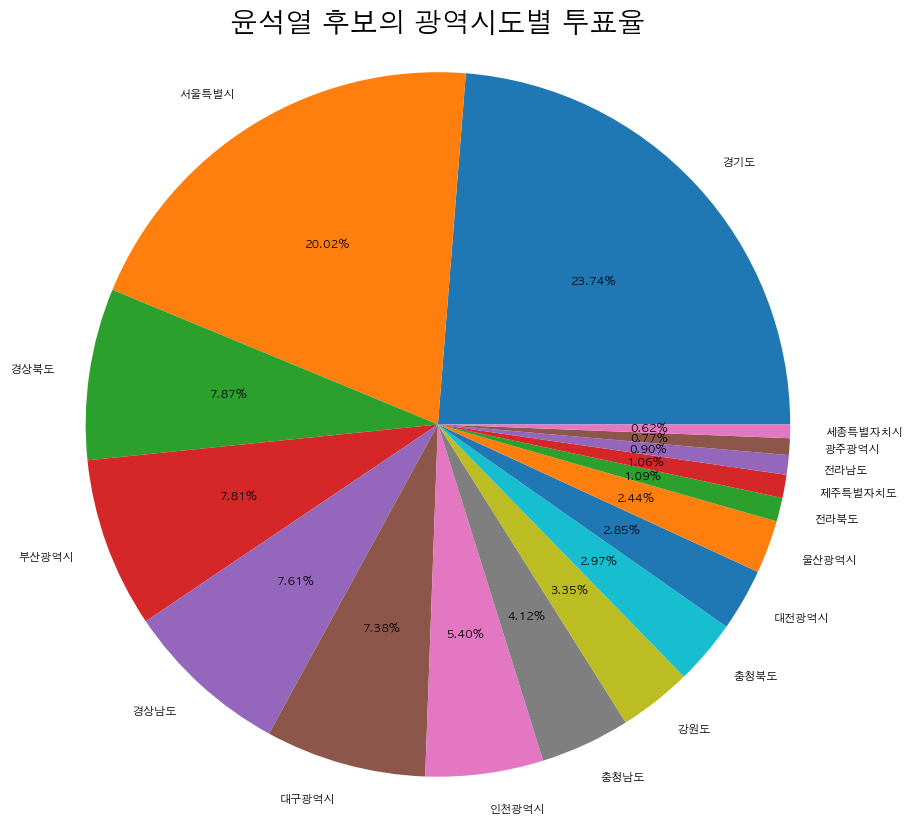

In [87]:
elec_yun_order['윤석열'].plot(
    kind='pie',
    figsize=(10, 10),      # label때문에 7:5로 사용
    autopct='%.2f%%',
    startangle=0,      # 파이차트 출력 위치 조정
    # colors=['chocolate', 'bisque', 'cadetblue']
)

plt.title('윤석열 후보의 광역시도별 투표율', size = 20)
plt.axis('equal')
plt.rcParams['font.size'] = 8
plt.ylabel('')
# plt.legend(
#     labels=df.index,
#     loc='upper right'
# )

plt.show()

### 윤석열 후보의 서울 득표 Top5

In [88]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [89]:
election_seoul = election[election['광역시도'].isin(['서울특별시'])]
election_seoul.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [90]:
election_seoul_yun = election_seoul.pivot_table("윤석열", index='시군구', aggfunc=sum)
# aggfunc='size' : data값의 크기를 기준으로 집계한다. (데이터 합계가 아니라 count 해줌)
election_seoul_yun = election_seoul_yun.sort_values(by='윤석열', ascending=False)

In [91]:
# election[election['광역시도'].isin(['서울특별시'])]
top5 = election_seoul_yun['윤석열'][:5]
others = election_seoul_yun['윤석열'][5:].sum()

In [92]:
pd.DataFrame(top5)

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340


In [93]:
others1 = pd.DataFrame(others ,columns = ['윤석열'],index=['기타'])
others1

,윤석열
기타,2240362


In [94]:
yun_top5 = pd.concat([pd.DataFrame(top5), others1])

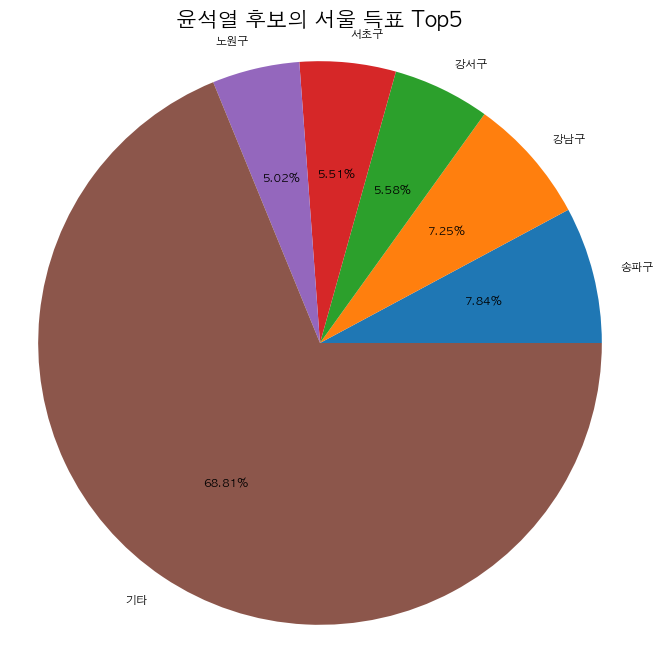

In [97]:
yun_top5['윤석열'].plot(
    kind='pie',
    figsize=(8, 8),      # label때문에 7:5로 사용
    autopct='%.2f%%',
    startangle=0,      # 파이차트 출력 위치 조정
    # colors=['chocolate', 'bisque', 'cadetblue']
)

plt.title('윤석열 후보의 서울 득표 Top5', size = 15)
plt.axis('equal')
plt.rcParams['font.size'] = 8
plt.ylabel('')
# plt.legend(
#     labels=df.index,
#     loc='upper right'
# )

plt.show()

### 윤석열 후보의 출생지는 성북구
- 성북구의 후보별 득표율 파이차트 그리기

In [109]:
election_sung =  election[election['시군구'].isin(['성북구'])]
election_sung

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [122]:
election_sung['기타'] =  election_sung['투표수'] - election_sung[['이재명','윤석열','심상정']].T.sum()
election_sung

/var/folders/rg/7y6gw9sj36x6_btml26l85mr0000gn/T/ipykernel_26525/490911972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_sung['기타'] =  election_sung['투표수'] - election_sung[['이재명','윤석열','심상정']].T.sum()


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,기타
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12,5489


In [125]:
election_sung = election_sung[['이재명','윤석열','심상정','기타']].T
election_sung

,7
이재명,142702
윤석열,135044
심상정,8952
기타,5489


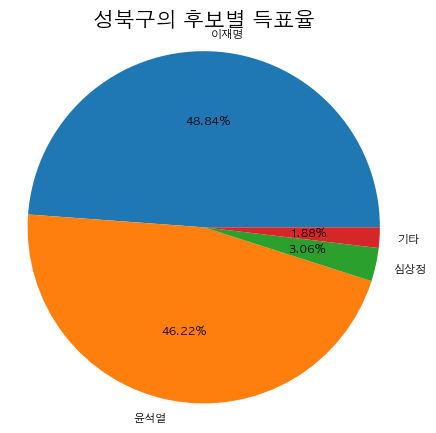

In [128]:
election_sung[7].plot(
    kind='pie',
    figsize=(5, 5),      # label때문에 7:5로 사용
    autopct='%.2f%%',
    startangle=0,      # 파이차트 출력 위치 조정
    # colors=['chocolate', 'bisque', 'cadetblue']
)

plt.title('성북구의 후보별 득표율', size = 15)
plt.axis('equal')
plt.rcParams['font.size'] = 8
plt.ylabel('')
# plt.legend(
#     labels=df.index,
#     loc='upper right'
# )

plt.show()

---
#### 투표수가 높은 광역시도 후보별 득표수

In [142]:
# election_sort = election.sort_values(by='투표수', ascending=False)
election_sort = election[election['광역시도'].isin(['경기도', '서울특별시', '부산광역시','경상남도'])]
election_sort = election_sort.pivot_table(["윤석열",'이재명','심상정'], index='광역시도', aggfunc=sum)

In [144]:
election_sort

,심상정,윤석열,이재명
광역시도,,,
경기도,201113,3859666,4297931
경상남도,52591,1237346,794130
부산광역시,47541,1270072,831896
서울특별시,180324,3255747,2944981


<Figure size 2000x500 with 0 Axes>

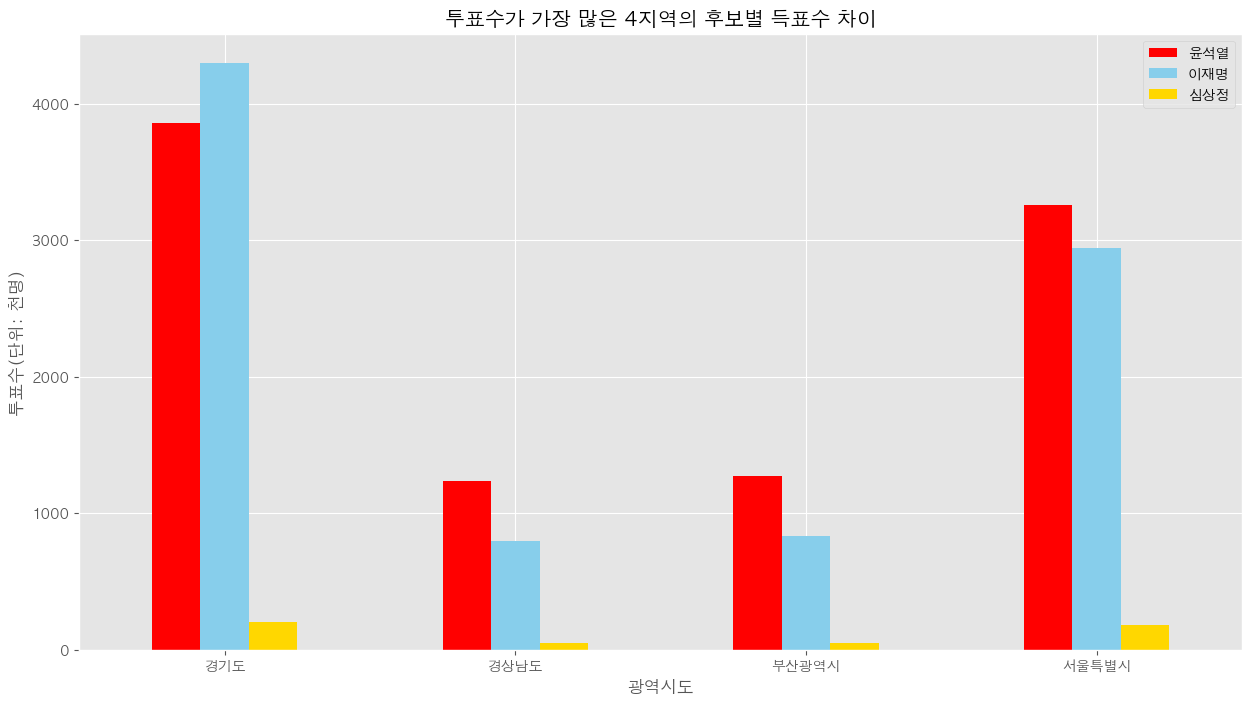

In [177]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot(1,1,1)     #1행, 1열, 1번째

# 지수 없애기
ax = (election_sort[["윤석열",'이재명','심상정']]/1000).plot(
    kind='bar',
    figsize=(15, 8),
    color=['red', '#87CEEB', 'gold'],
    ylabel='투표수(단위: 천명)',
    xlabel='광역시도',
    title = ('투표수가 가장 많은 4지역의 후보별 득표수 차이')

)

# ax.set_xlabel('기간', size=12)
# ax.set_ylabel('이동 인구수', size=12)
# # x축 라벨s 각도

ax.set_xticklabels(election_sort.index, rotation=0)

plt.show()


---
#### 투표수가 높은 시군의 후보별 득표수

In [186]:
election_sigungu = election.sort_values(by='투표수', ascending=False)[['광역시도','시군구','이재명','윤석열','심상정']].head()
election_sigungu

,광역시도,시군구,이재명,윤석열,심상정
100,경기도,화성시,283324,236055,12955
85,경기도,부천시,285227,224331,13249
98,경기도,남양주시,239179,203075,10089
23,서울특별시,송파구,180490,255166,10652
15,서울특별시,강서구,190000,181510,11100


In [198]:
election_sigungu[['윤석열','이재명','심상정']]

,윤석열,이재명,심상정
100,236055,283324,12955
85,224331,285227,13249
98,203075,239179,10089
23,255166,180490,10652
15,181510,190000,11100


In [205]:
x = []
for i in zip(election_sigungu.광역시도, election_sigungu.시군구):
    x.append(i)
    
x

[('경기도', '화성시'),
 ('경기도', '부천시'),
 ('경기도', '남양주시'),
 ('서울특별시', '송파구'),
 ('서울특별시', '강서구')]

In [207]:
election_sigungu.index = election_sigungu['광역시도'] + " " + election_sigungu['시군구']
election_sigungu.index

Index(['경기도 화성시', '경기도 부천시', '경기도 남양주시', '서울특별시 송파구', '서울특별시 강서구'], dtype='object')

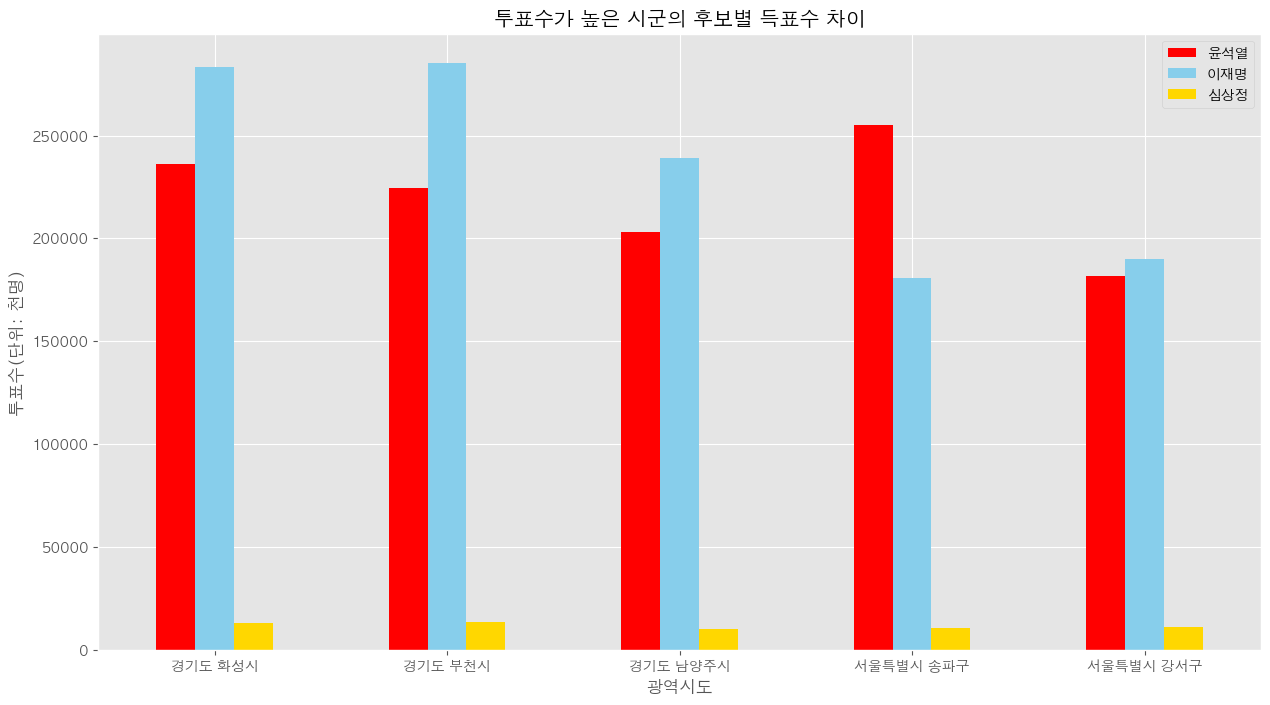

In [211]:
plt.style.use('ggplot')
# fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot(1,1,1)     #1행, 1열, 1번째

ax = election_sigungu[['윤석열','이재명','심상정']].plot(
    kind='bar',
    figsize=(15, 8),
    color=['red', '#87CEEB', 'gold'],
    ylabel='투표수(단위: 천명)',
    xlabel='광역시도',
    title = ('투표수가 높은 시군의 후보별 득표수 차이'),

)

# ax.set_xlabel('기간', size=12)
# ax.set_ylabel('이동 인구수', size=12)
# # x축 라벨s 각도

ax.set_xticklabels(election_sigungu.index, rotation=0)

plt.show()
